In [ ]:
import pandas as pd
import skimage.io
import skimage.feature
import skimage.transform
import sklearn.decomposition
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

data_dir = "data"

train_df = pd.read_parquet(os.path.join(data_dir, "dataset_color_features.parquet"))
train_hog_features = np.array(train_df["hog_features"].to_list())
train_color_features = np.array(train_df["color_features"].to_list())
train_features = np.concatenate((train_hog_features, train_color_features), axis=1)

pca = sklearn.decomposition.PCA(n_components=512)


reduced_train_features = pca.fit_transform(train_features)


X_train = reduced_train_features
y_train = train_df["label"].to_numpy()

model = SVC()
model.fit(X_train, y_train)

SVC()

In [2]:
json_paths = []

for root, dirs, files in os.walk("/home/dzbanek/VSCodeProjects/aoc/src/aoc/data/stos"):
    for file in files:
        print(file)
        json_paths.append(os.path.join(root, file))

20241204_172953.json
20241204_172934.json
20241204_173032.json
20241204_172938.json
20241204_173040.json
20241204_173115.json
20241204_173030.json
20241204_173001.json
20241204_172942.json
20241204_172905.json
20241204_172910.json
20241204_172902.json
20241204_172908.json
20241204_172854.json
20241204_173112.json
20241204_173145.json
20241204_173127.json
20241204_172917.json
20241204_173013.json
20241204_172846.json
20241204_173108.json
20241204_172851.json
20241204_173052.json
20241204_173148.json
20241204_173055.json
20241204_172945.json
20241204_173016.json
20241204_173058.json
20241204_173131.json
20241204_173152.json
20241204_172913.json
20241204_173120.json
20241204_173044.json
20241204_173020.json
20241204_172957.json


In [3]:
from json import load

import cv2 as cv
import matplotlib.pyplot as plt
from tqdm import tqdm

from aoc.utils import (
    extract_coin,
    extract_hog_features,
    extract_color_features,
    grayscale_equalize_coin,
)

image_paths = []
test_hog_features = []
test_color_features = []
test_labels = []
x1 = []
x2 = []
y1 = []
y2 = []

for path in tqdm(json_paths):

    with open(path, "r") as f:
        data = load(f)
        image_path = os.path.join(
            os.path.dirname(os.path.dirname(path)), "Stos", data["imagePath"]
        )

        image = cv.imread(image_path)

        image = image[:, :, ::-1]

        for item in data["shapes"]:
            bounding_box = (
                item["points"][0][0],
                item["points"][0][1],
                item["points"][1][0],
                item["points"][1][1],
            )

            if bounding_box[0] > bounding_box[2]:
                bounding_box = (
                    item["points"][1][0],
                    item["points"][1][1],
                    item["points"][0][0],
                    item["points"][0][1],
                )

            bounding_box = tuple(map(int, bounding_box))
            extracted_coin = extract_coin(image, bounding_box)

            color_features = extract_color_features(extracted_coin)

            extracted_coin = grayscale_equalize_coin(extracted_coin)

            hog_features = extract_hog_features(extracted_coin)

            image_paths.append(image_path)
            test_hog_features.append(hog_features)
            test_color_features.append(color_features)
            test_labels.append(int(item["label"]))
            x1.append(bounding_box[0])
            x2.append(bounding_box[2])
            y1.append(bounding_box[1])
            y2.append(bounding_box[3])

100%|██████████| 35/35 [00:48<00:00,  1.39s/it]


In [4]:
test_df = pd.DataFrame(
    {
        "img_dir": image_paths,
        "hog_features": test_hog_features,
        "color_features": test_color_features,
        "label": test_labels,
        "x1": x1,
        "y1": y1,
        "x2": x2,
        "y2": y2,
    }
)

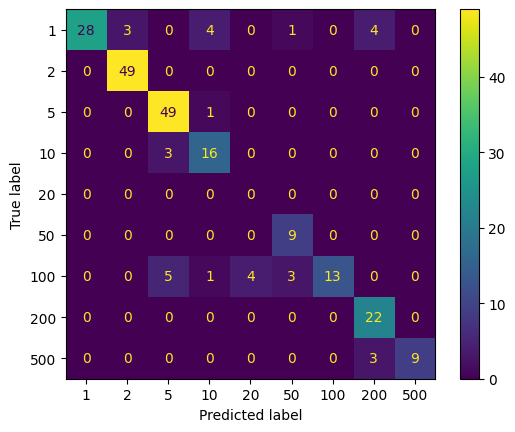

In [ ]:
test_color_features = np.array(test_df["color_features"].to_list())
test_hog_features = np.array(test_df["hog_features"].to_list())
test_features = np.concatenate((test_hog_features, test_color_features), axis=1)

X_test = pca.transform(test_features)
y_test = np.array(test_df["label"].to_list())


ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [6]:
y_pred = model.predict(X_test)

test_df["pred"] = y_pred

In [7]:
# calculate accuracy

accuracy = (test_df["label"] == test_df["pred"]).mean()
accuracy

np.float64(0.8590308370044053)

In [8]:
mislabeled_df = test_df[test_df["label"] != test_df["pred"]]

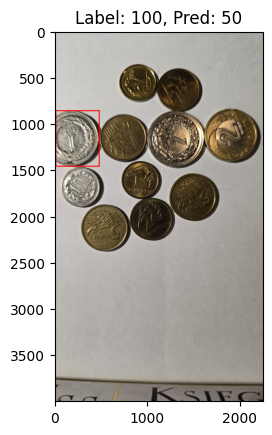

Corrupt JPEG data: 1 extraneous bytes before marker 0xd0


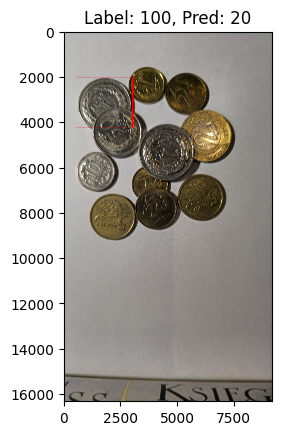

Corrupt JPEG data: 1 extraneous bytes before marker 0xd0


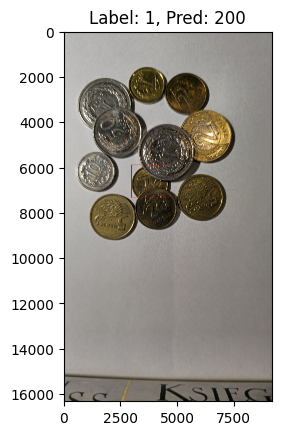

Corrupt JPEG data: 1 extraneous bytes before marker 0xd3


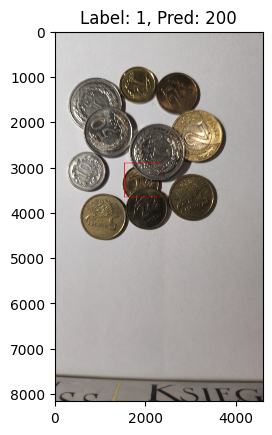

Corrupt JPEG data: 1 extraneous bytes before marker 0xd3


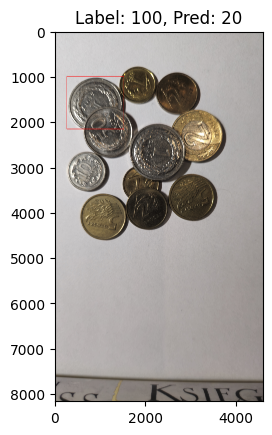

Corrupt JPEG data: 1 extraneous bytes before marker 0xd5


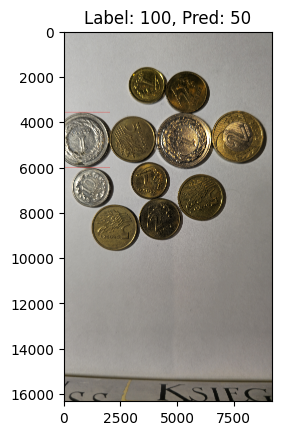

Corrupt JPEG data: 1 extraneous bytes before marker 0xd5


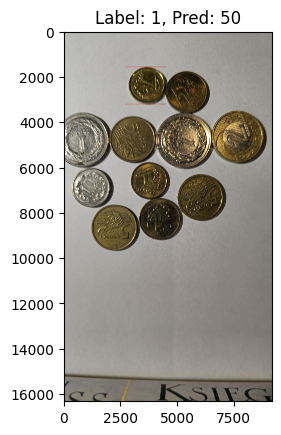

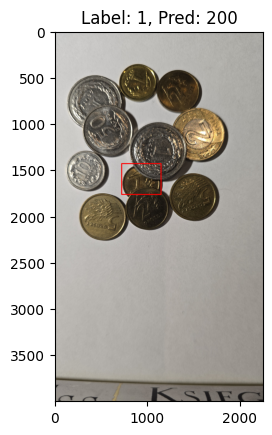

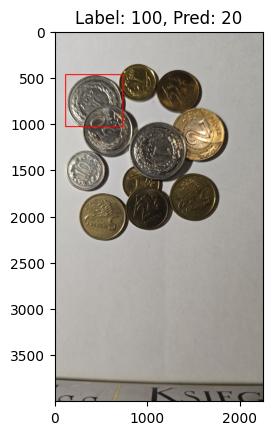

Corrupt JPEG data: 1 extraneous bytes before marker 0xd0


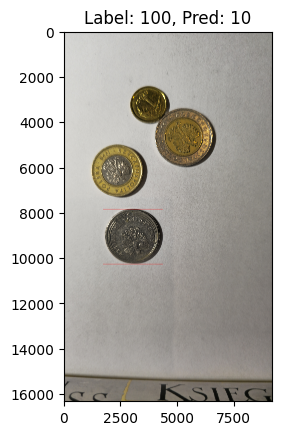

Corrupt JPEG data: 1 extraneous bytes before marker 0xd0


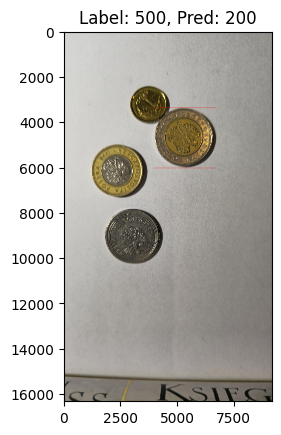

Corrupt JPEG data: 1 extraneous bytes before marker 0xd0


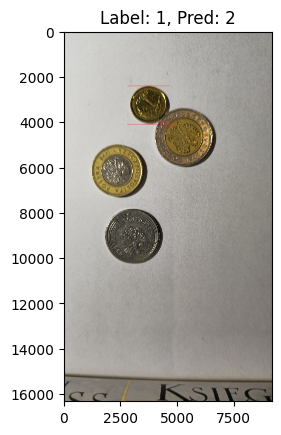

Corrupt JPEG data: 4 extraneous bytes before marker 0xd6


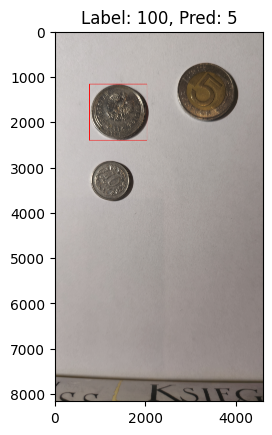

Corrupt JPEG data: 1 extraneous bytes before marker 0xd1


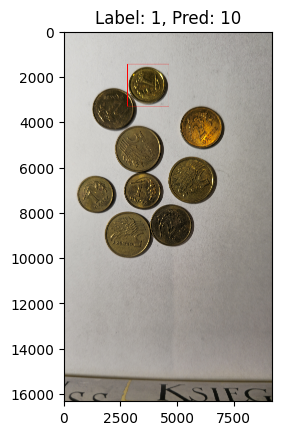

Corrupt JPEG data: 1 extraneous bytes before marker 0xd7


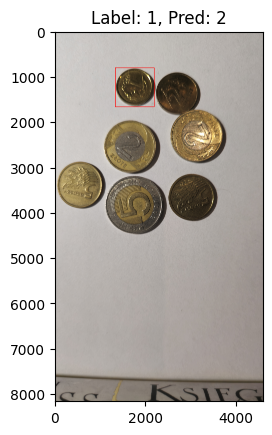

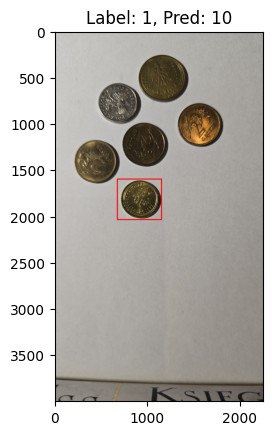

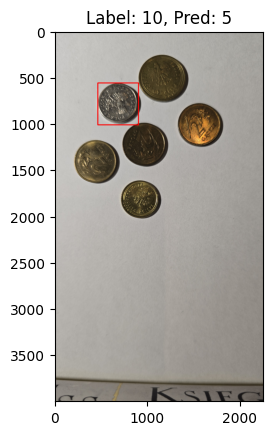

Corrupt JPEG data: 1 extraneous bytes before marker 0xd7


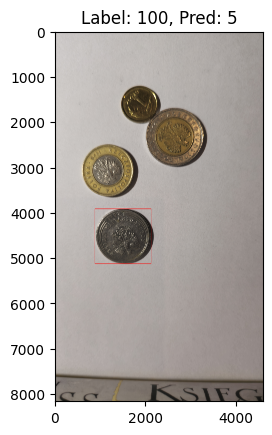

Corrupt JPEG data: 1 extraneous bytes before marker 0xd7


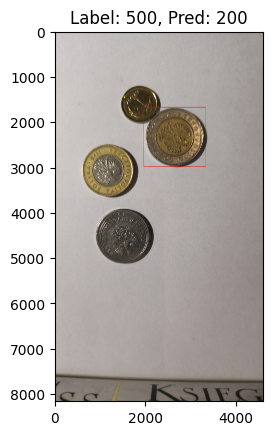

Corrupt JPEG data: 2 extraneous bytes before marker 0xd7


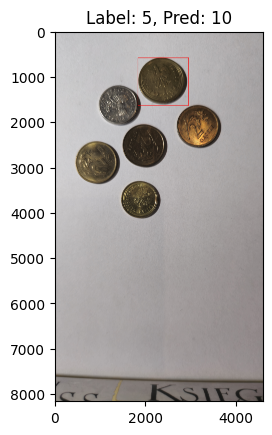

Corrupt JPEG data: 2 extraneous bytes before marker 0xd7


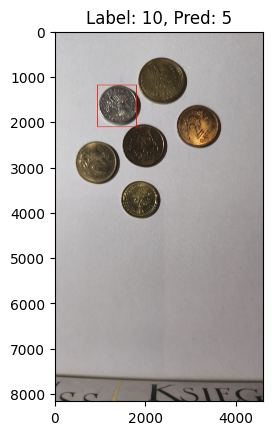

Corrupt JPEG data: 2 extraneous bytes before marker 0xd7


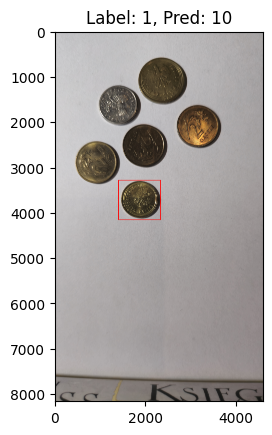

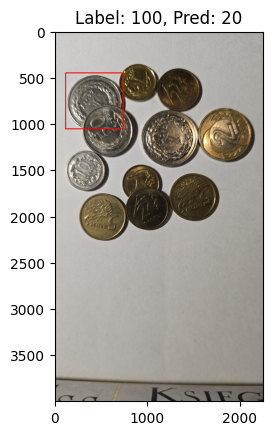

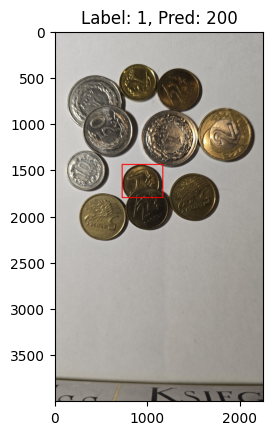

Corrupt JPEG data: 2 extraneous bytes before marker 0xd4


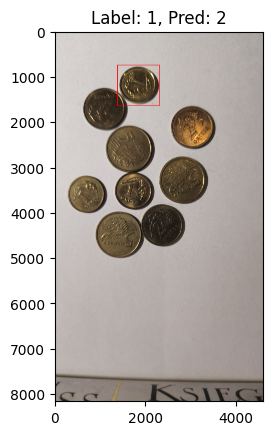

Corrupt JPEG data: 1 extraneous bytes before marker 0xd7


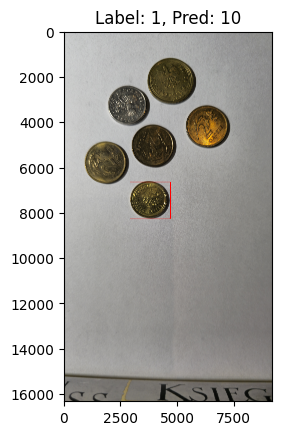

Corrupt JPEG data: 1 extraneous bytes before marker 0xd7


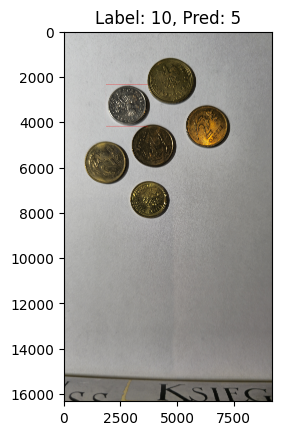

Corrupt JPEG data: 1 extraneous bytes before marker 0xd5


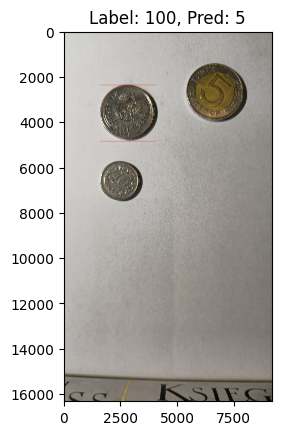

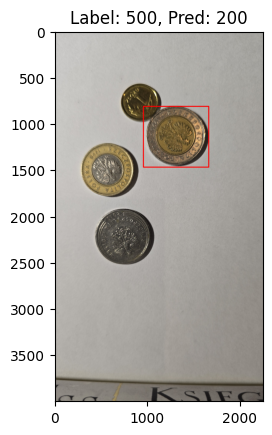

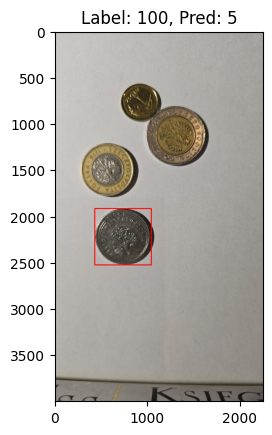

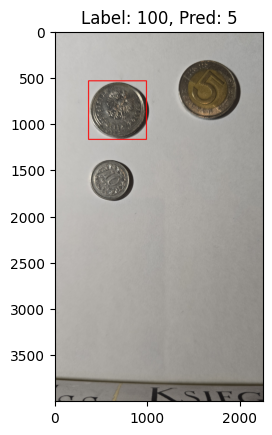

Corrupt JPEG data: 1 extraneous bytes before marker 0xd7


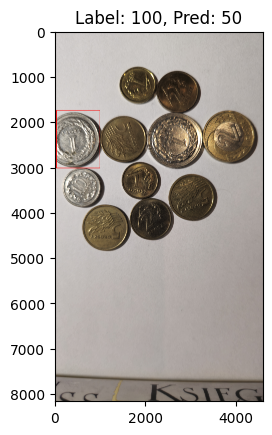

In [9]:
for index, row in mislabeled_df.iterrows():
    # show image

    image = cv.imread(row["img_dir"])

    cv.rectangle(image, (row["x1"], row["y1"]), (row["x2"], row["y2"]), (0, 0, 255), 10)
    image = image[:, :, ::-1]

    plt.imshow(image)
    plt.title(f"Label: {row['label']}, Pred: {row['pred']}")
    plt.show()